Data type:  uint8
Min value:  0
Max value:  255
Shape:  (128, 128)


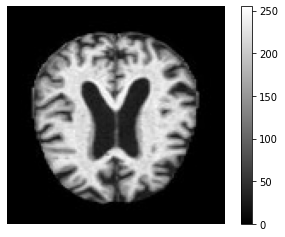

In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

#Load the image
im = imageio.imread("/content/mild.jpg")
print("Data type: ", im.dtype)
print("Min value: ", im.min())
print("Max value: ", im.max())
print("Shape: ", im.shape)

#Plot the grayscale image
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.colorbar();

In [ ]:
def SaltAndPaper(image, density):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # parameter for controlling how much salt and paper are added
    threshhold = 1 - density

    # loop every each pixel and decide add the noise or not base on threshhold (density)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            possibility = random.random()
            if possibility < density:
                output[i][j] = 0
            elif possibility > threshhold:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [ ]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

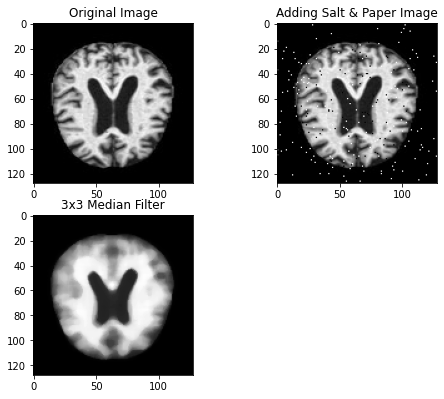

In [ ]:
  # add salt and paper (0.01 is a proper parameter)
  noise_hand = SaltAndPaper(im, 0.01)

  # use 3x3 mean filter
  mean_3x3_hand = median_filter(noise_hand, 9)

  # use 5x5 mean filter
  mean_5x5_hand = median_filter(noise_hand, 25)

  # set up side-by-side image display
  fig = plt.figure()
  fig.set_figheight(10)
  fig.set_figwidth(8)

  # display the oringinal image
  fig.add_subplot(3, 2, 1)
  plt.title('Original Image')
  plt.imshow(im, cmap='gray')

  # display the salt and paper image
  fig.add_subplot(3, 2, 2)
  plt.title('Adding Salt & Paper Image')
  plt.imshow(noise_hand, cmap='gray')

  # display 3x3 mean filter
  fig.add_subplot(3, 2, 3)
  plt.title('3x3 Median Filter')
  plt.imshow(mean_3x3_hand, cmap='gray')

  plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
 
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
 
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
 
    return output

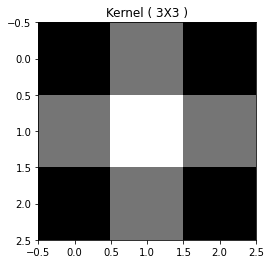

Image Shape : (128, 128)
Kernel Shape : (3, 3)


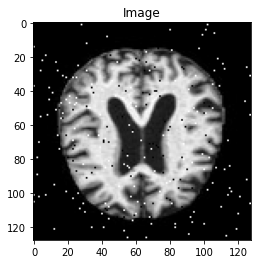

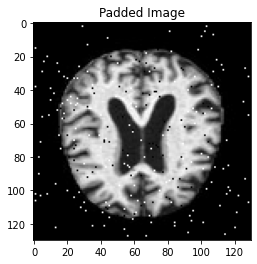

Output Image size : (128, 128)


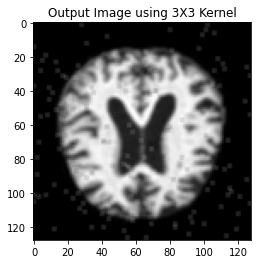

In [ ]:
import math

def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()

    return kernel_2D


def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)


if __name__ == '__main__':
    gaussian_blur(noise_hand, 3, verbose=True)